In [1]:
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv(r"C:\Users\msmir\Downloads\schizophrenia_dataset.csv")
data.drop(columns = 'Hasta_ID', inplace=True)
data

Yaş  Cinsiyet  Eğitim_Seviyesi  Medeni_Durum  Meslek  Gelir_Düzeyi  \
0      72         1                4             2       0             2   
1      49         1                5             2       2             1   
2      53         1                5             3       2             1   
3      67         1                3             2       0             2   
4      54         0                1             2       0             2   
...   ...       ...              ...           ...     ...           ...   
9995   72         0                2             3       3             0   
9996   27         0                3             3       3             0   
9997   31         1                3             2       0             0   
9998   56         1                4             1       1             2   
9999   53         0                1             3       1             0   

      Yaşadığı_Yer  Tanı  Hastalık_Süresi  Hastaneye_Yatış_Sayısı  \
0                1     0                0                       0   
1                0     1               35                       1   
2                0     1               32                       0   
3                0     0                0                       0   
4                1     0                0                       0   
...            ...   ...              ...                     ...   
9995             1     1               18                       1   
9996             0     1                6                       6   
9997             0     1               29                       9   
9998             1     0                0                       0   
9999             1     0                0                       0   

      Ailede_Şizofreni_Öyküsü  Madde_Kullanımı  İntihar_Girişimi  \
0                           0                0                 0   
1                           1                1                 1   
2                           1                0                 0   
3                           0                1                 0   
4                           0                0                 0   
...                       ...              ...               ...   
9995                        1                0                 1   
9996                        0                0                 0   
9997                        1                1                 0   
9998                        0                0                 0   
9999                        0                0                 0   

      Pozitif_Semptom_Skoru  Negatif_Semptom_Skoru  GAF_Skoru  Sosyal_Destek  \
0                        32                     48         72              0   
1                        51                     63         40              2   
2                        72                     85         51              0   
3                        10                     21         74              1   
4                         4                     27         98              0   
...                     ...                    ...        ...            ...   
9995                     84                     74         54              1   
9996                     99                     50         53              2   
9997                     65                     65         60              1   
9998                     38                     10         74              0   
9999                     24                     21         87              1   

      Stres_Faktörleri  İlaç_Uyumu  
0                    2           2  
1                    2           0  
2                    1           1  
3                    1           2  
4                    1           0  
...                ...         ...  
9995                 1           1  
9996                 2           0  
9997                 1           1  
9998                 1           2  
9999                 2           0  

[10000 rows x 19 columns]

In [3]:
data.columns

Index(['Yaş', 'Cinsiyet', 'Eğitim_Seviyesi', 'Medeni_Durum', 'Meslek',
       'Gelir_Düzeyi', 'Yaşadığı_Yer', 'Tanı', 'Hastalık_Süresi',
       'Hastaneye_Yatış_Sayısı', 'Ailede_Şizofreni_Öyküsü', 'Madde_Kullanımı',
       'İntihar_Girişimi', 'Pozitif_Semptom_Skoru', 'Negatif_Semptom_Skoru',
       'GAF_Skoru', 'Sosyal_Destek', 'Stres_Faktörleri', 'İlaç_Uyumu'],
      dtype='object')

In [4]:
new_columns = {
    'Yaş': 'Возраст',
    'Cinsiyet': 'Пол',
    'Eğitim_Seviyesi': 'Уровень образования',
    'Medeni_Durum': 'Семейное положение',
    'Meslek': 'Профессия',
    'Gelir_Düzeyi': 'Уровень дохода',
    'Yaşadığı_Yer': 'Место проживания',
    'Tanı': 'Диагноз',
    'Hastalık_Süresi': 'Продолжительность заболевания',
    'Hastaneye_Yatış_Sayısı': 'Количество госпитализаций',
    'Ailede_Şizofreni_Öyküsü': 'История шизофрении в семье',
    'Madde_Kullanımı': 'Использование веществ',
    'İntihar_Girişimi': 'Попытка самоубийства',
    'Pozitif_Semptom_Skoru': 'Баллы позитивных симптомов',
    'Negatif_Semptom_Skoru': 'Баллы негативных симптомов',
    'GAF_Skoru': 'Оценочный балл глобального функционирования (GAF)',
    'Sosyal_Destek': 'Социальная поддержка',
    'Stres_Faktörleri': 'Факторы стресса',
    'İlaç_Uyumu': 'Соблюдение медикаментозного лечения'
}


In [5]:
data.rename(columns = new_columns, inplace = True)
data

Возраст  Пол  Уровень образования  Семейное положение  Профессия  \
0          72    1                    4                   2          0   
1          49    1                    5                   2          2   
2          53    1                    5                   3          2   
3          67    1                    3                   2          0   
4          54    0                    1                   2          0   
...       ...  ...                  ...                 ...        ...   
9995       72    0                    2                   3          3   
9996       27    0                    3                   3          3   
9997       31    1                    3                   2          0   
9998       56    1                    4                   1          1   
9999       53    0                    1                   3          1   

      Уровень дохода  Место проживания  Диагноз  \
0                  2                 1        0   
1                  1                 0        1   
2                  1                 0        1   
3                  2                 0        0   
4                  2                 1        0   
...              ...               ...      ...   
9995               0                 1        1   
9996               0                 0        1   
9997               0                 0        1   
9998               2                 1        0   
9999               0                 1        0   

      Продолжительность заболевания  Количество госпитализаций  \
0                                 0                          0   
1                                35                          1   
2                                32                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
9995                             18                          1   
9996                              6                          6   
9997                             29                          9   
9998                              0                          0   
9999                              0                          0   

      История шизофрении в семье  Использование веществ  Попытка самоубийства  \
0                              0                      0                     0   
1                              1                      1                     1   
2                              1                      0                     0   
3                              0                      1                     0   
4                              0                      0                     0   
...                          ...                    ...                   ...   
9995                           1                      0                     1   
9996                           0                      0                     0   
9997                           1                      1                     0   
9998                           0                      0                     0   
9999                           0                      0                     0   

      Баллы позитивных симптомов  Баллы негативных симптомов  \
0                             32                          48   
1                             51                          63   
2                             72                          85   
3                             10                          21   
4                              4                          27   
...                          ...                         ...   
9995                          84                          74   
9996                          99                          50   
9997                          65                          65   
9998                          38                          10   
9999                          24  

In [6]:
data.describe()

Возраст           Пол  Уровень образования  Семейное положение  \
count  10000.000000  10000.000000         10000.000000        10000.000000   
mean      48.867700      0.502600             3.042600            1.518200   
std       18.215054      0.500018             1.423021            1.117315   
min       18.000000      0.000000             1.000000            0.000000   
25%       33.000000      0.000000             2.000000            1.000000   
50%       49.000000      1.000000             3.000000            2.000000   
75%       65.000000      1.000000             4.000000            3.000000   
max       80.000000      1.000000             5.000000            3.000000   

          Профессия  Уровень дохода  Место проживания       Диагноз  \
count  10000.000000    10000.000000      10000.000000  10000.000000   
mean       1.510600        0.996900          0.499400      0.288700   
std        1.114097        0.817531          0.500025      0.453181   
min        0.000000        0.000000          0.000000      0.000000   
25%        1.000000        0.000000          0.000000      0.000000   
50%        2.000000        1.000000          0.000000      0.000000   
75%        3.000000        2.000000          1.000000      1.000000   
max        3.000000        2.000000          1.000000      1.000000   

       Продолжительность заболевания  Количество госпитализаций  \
count                   10000.000000               10000.000000   
mean                        5.859000                   1.440300   
std                        11.066814                   2.824152   
min                         0.000000                   0.000000   
25%                         0.000000                   0.000000   
50%                         0.000000                   0.000000   
75%                         5.250000                   1.000000   
max                        40.000000                  10.000000   

       История шизофрении в семье  Использование веществ  \
count                10000.000000           10000.000000   
mean                     0.319600               0.217700   
std                      0.466345               0.412703   
min                      0.000000               0.000000   
25%                      0.000000               0.000000   
50%                      0.000000               0.000000   
75%                      1.000000               0.000000   
max                      1.000000               1.000000   

       Попытка самоубийства  Баллы позитивных симптомов  \
count           10000.00000                10000.000000   
mean                0.08840                   39.019000   
std                 0.28389                   27.276962   
min                 0.00000                    0.000000   
25%                 0.00000                   17.000000   
50%                 0.00000                   35.000000   
75%                 0.00000                   57.000000   
max                 1.00000                  100.000000   

       Баллы негативных симптомов  \
count                  10000.0000   
mean                      39.4614   
std                       27.0175   
min                        0.0000   
25%                       18.0000   
50%                       35.0000   
75%                       57.0000   
max                      100.0000   

       Оценочный балл глобального функционирования (GAF)  \
count                                       10000.000000   
mean                                           67.031800   
std                                            23.999833   
min                                            10.000000   
25%                                            54.000000   
50%                                            72.000000   
75%                                            86.000000   
max                                           100.000000   

       Социальная поддержка  Факторы стресса  \
count          10000.000000     10000.000000   
mean               0.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Возраст                                            10000 non-null  int64
 1   Пол                                                10000 non-null  int64
 2   Уровень образования                                10000 non-null  int64
 3   Семейное положение                                 10000 non-null  int64
 4   Профессия                                          10000 non-null  int64
 5   Уровень дохода                                     10000 non-null  int64
 6   Место проживания                                   10000 non-null  int64
 7   Диагноз                                            10000 non-null  int64
 8   Продолжительность заболевания                      10000 non-null  int64
 9   Количество госпитализаций    

<Axes: >

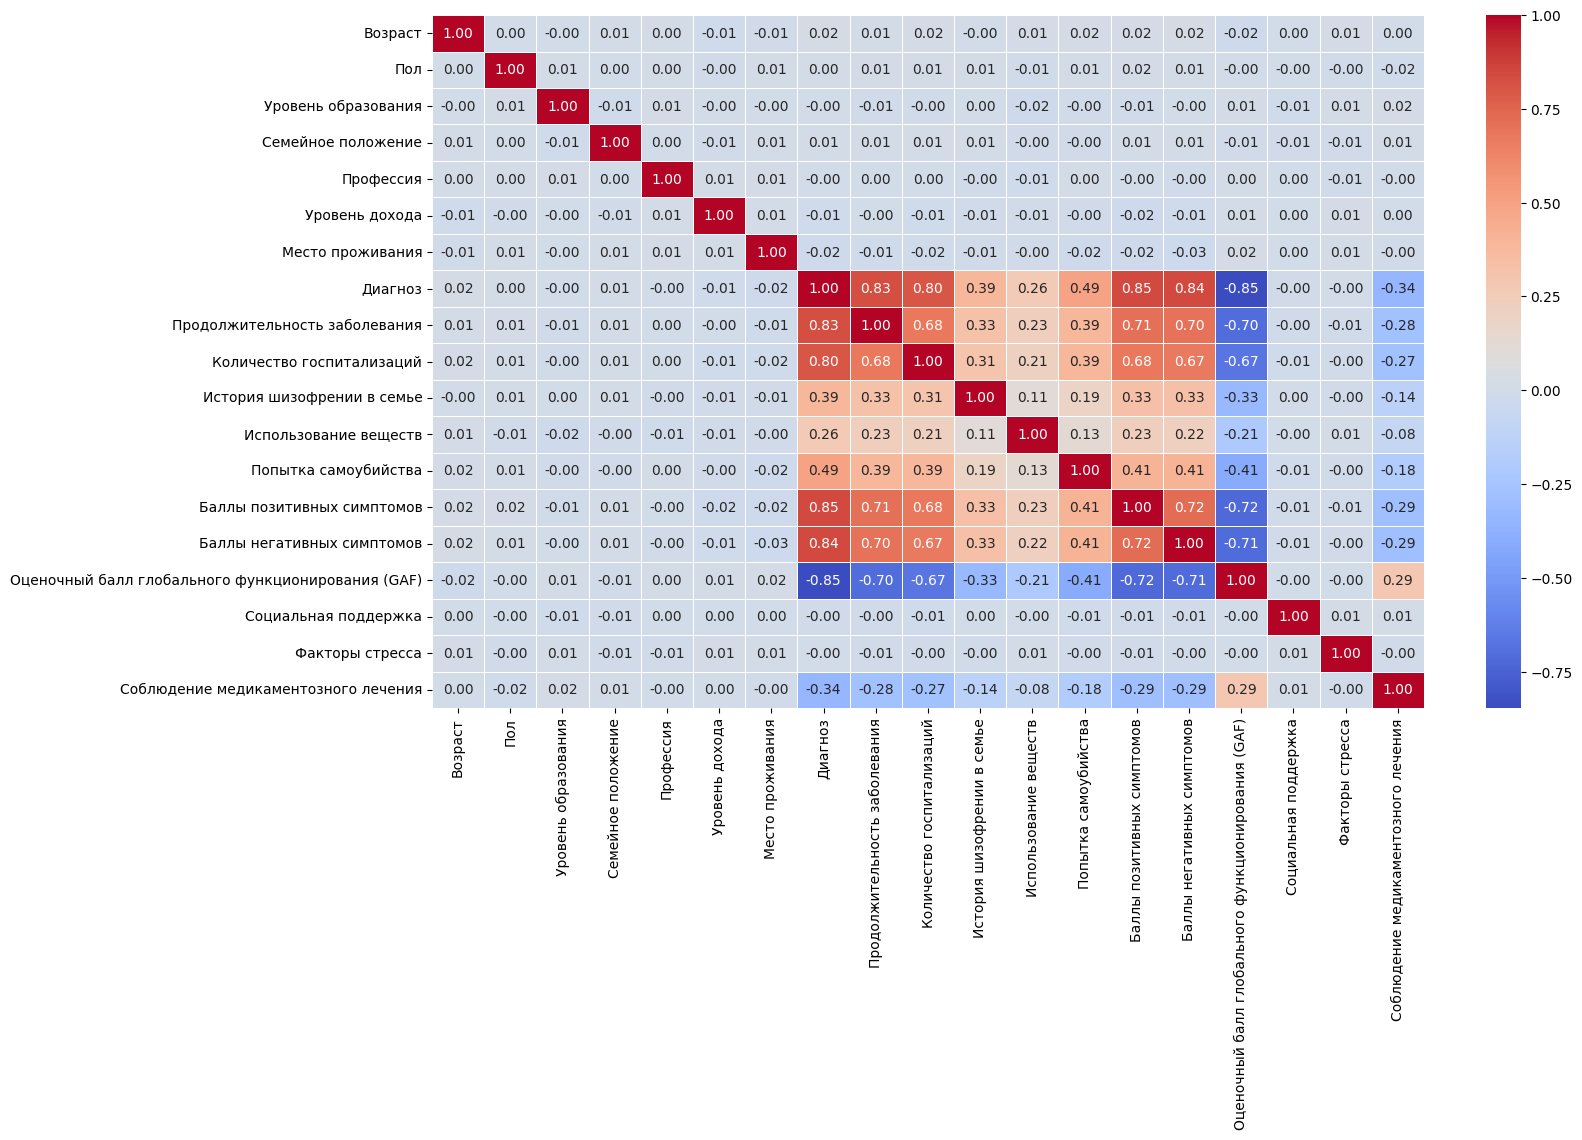

In [37]:
corr_matrix = data.corr()
plt.figure(figsize= (16,9))
sns.heatmap(data = corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

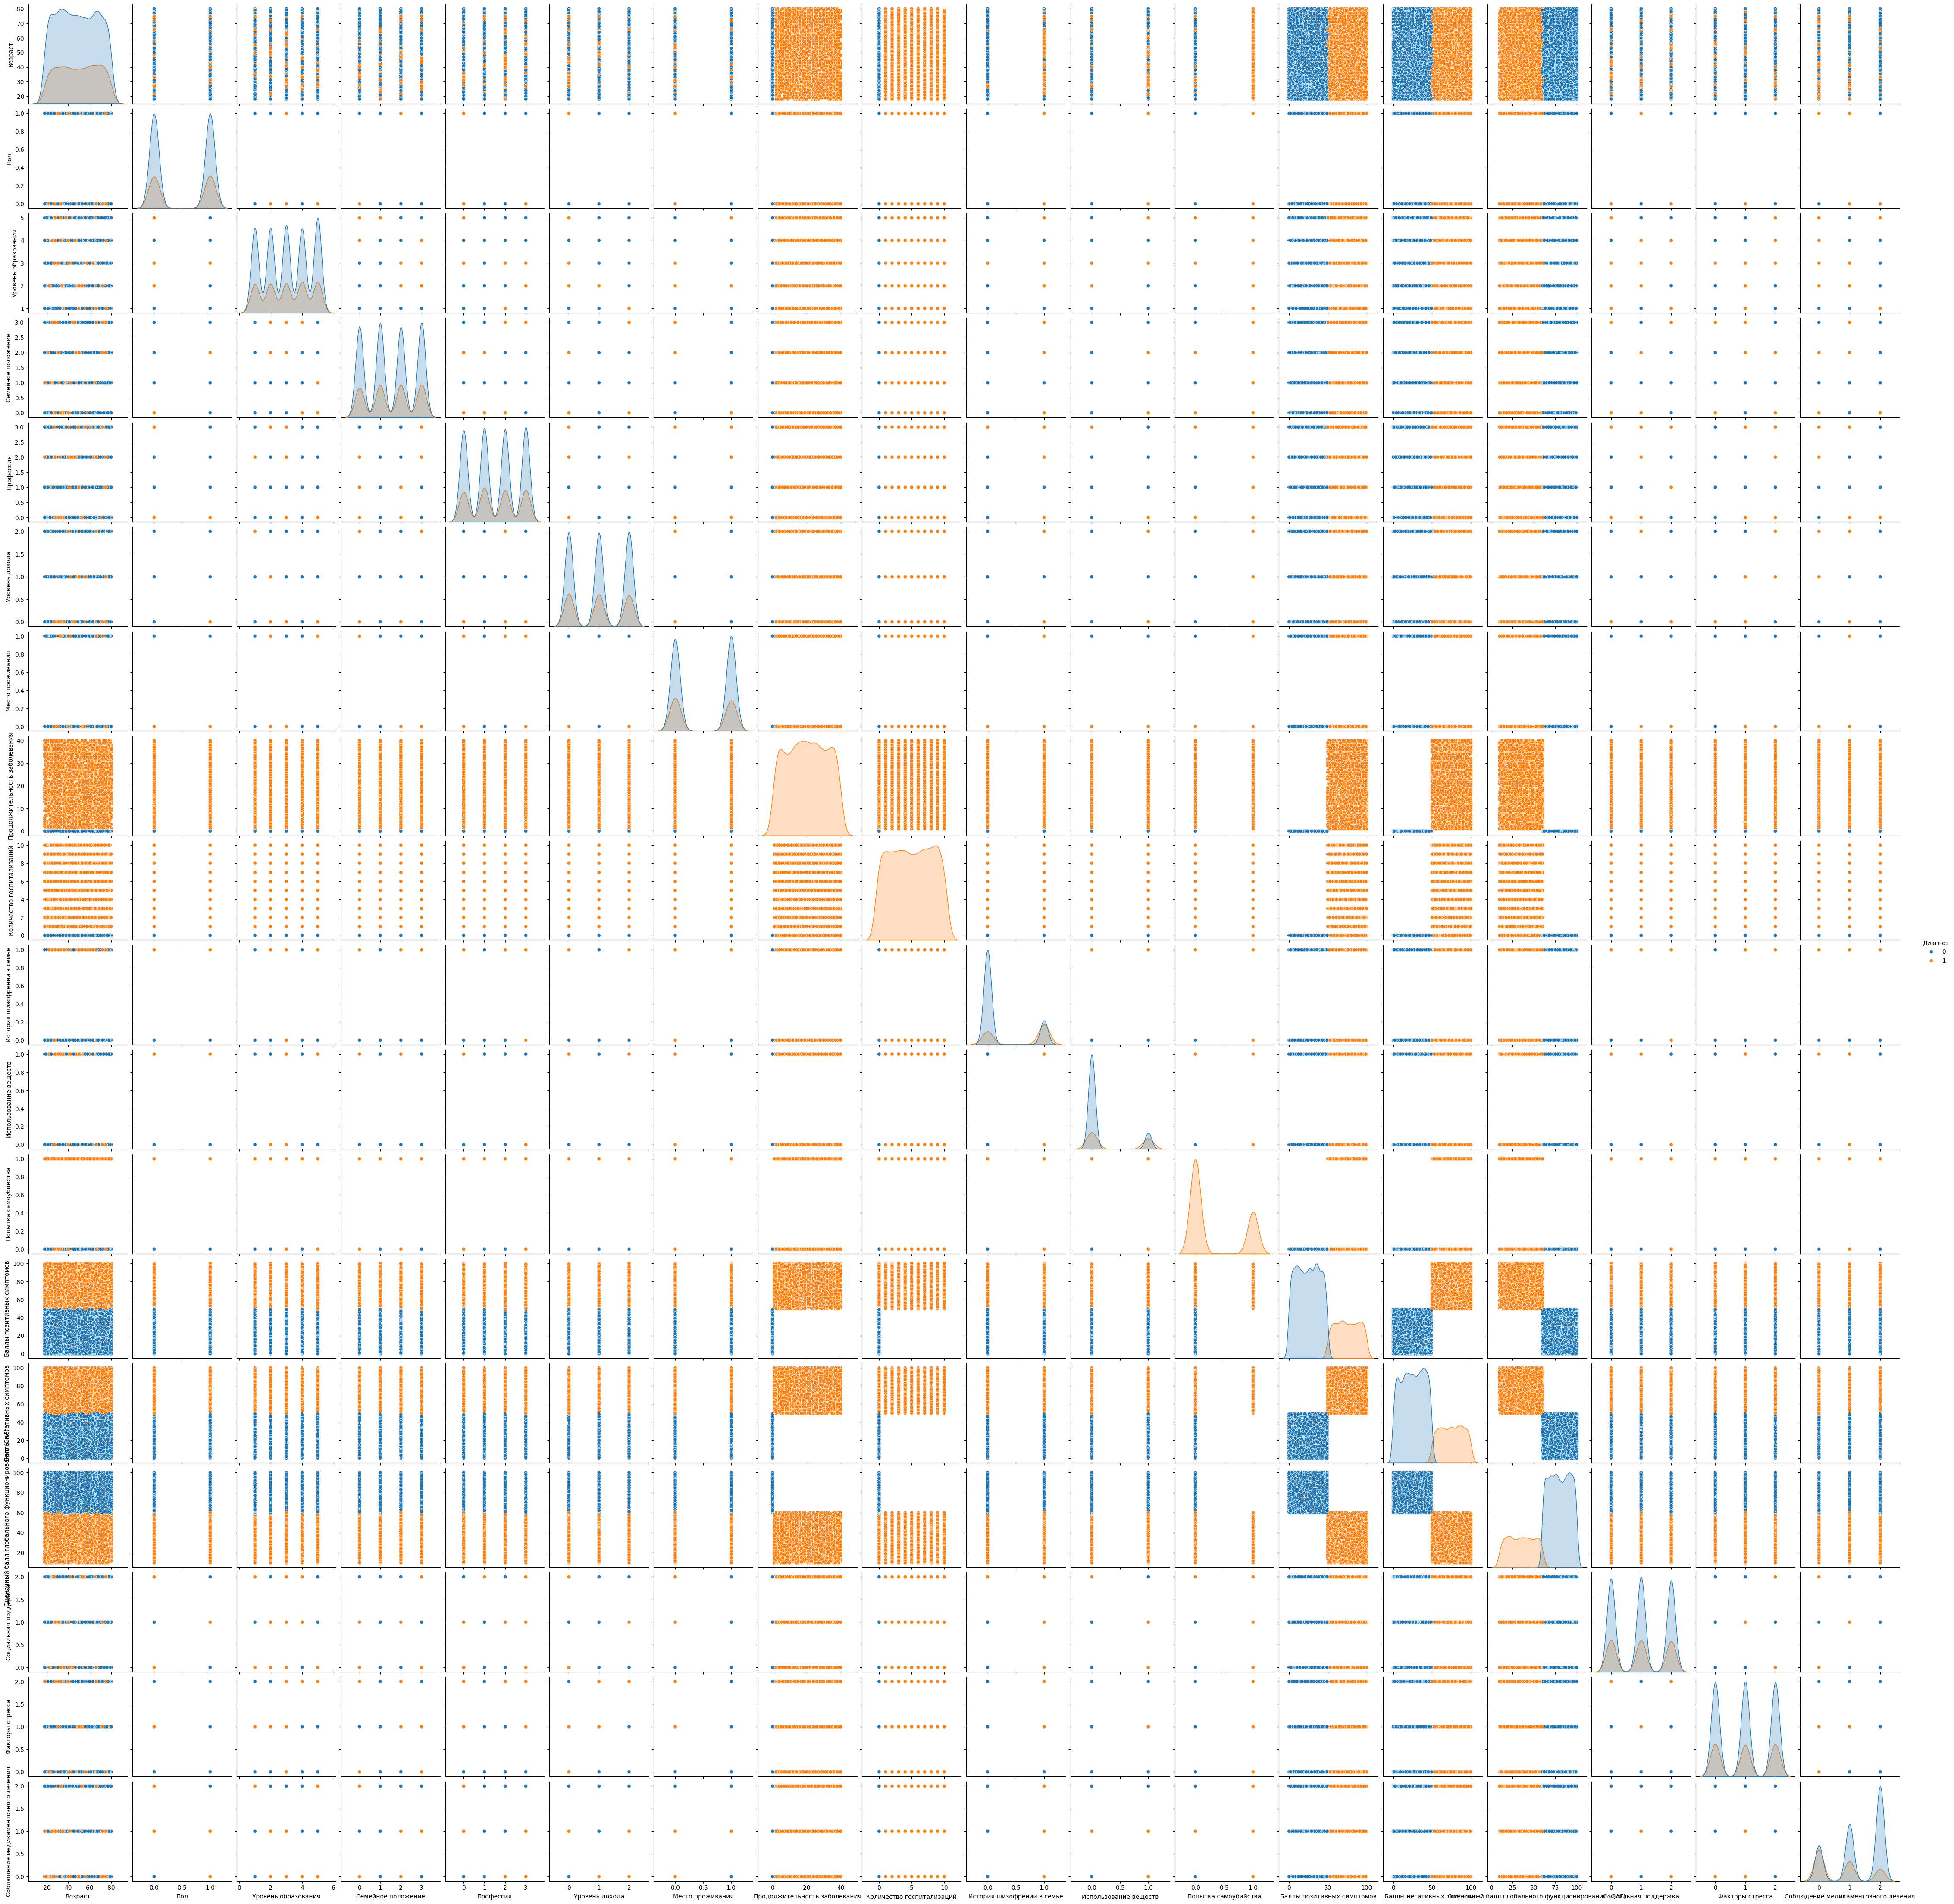

In [8]:
sns.pairplot(data = data, hue = 'Диагноз')


In [8]:
y = data.Диагноз

In [9]:
X = data.drop(columns = 'Диагноз')

### decision tree

In [11]:
tree_model_ent = DecisionTreeClassifier(criterion = 'entropy')
tree_model_gini = DecisionTreeClassifier(criterion = 'gini')
rand_forest_model_ent = RandomForestClassifier(criterion = 'entropy')
rand_forest_model_gini = RandomForestClassifier(criterion = 'gini')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size= 0.25)

In [13]:
tree_model_ent.fit(X_train, y_train)
tree_model_gini.fit(X_train, y_train)
rand_forest_model_ent.fit(X_train, y_train)
rand_forest_model_gini.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
tree_model_ent_pred = tree_model_ent.predict(X_test)
tree_model_gini_pred = tree_model_gini.predict(X_test)
rand_forest_model_ent_pred = rand_forest_model_ent.predict(X_test)
rand_forest_model_gini_pred = rand_forest_model_gini.predict(X_test)

In [15]:
def accuracy_assessment(model_pred,y):
    print(f'accuracy - {accuracy_score(model_pred,y)}')
    print(f'f1_score - {f1_score(model_pred,y)}')
    print(f'MSE - {mean_squared_error(model_pred,y)}')
    print(f'MAE - {mean_absolute_error(model_pred,y)}')

In [16]:
accuracy_assessment(tree_model_ent_pred, y_test)

accuracy - 1.0
f1_score - 1.0
MSE - 0.0
MAE - 0.0


In [17]:
accuracy_assessment(tree_model_gini_pred, y_test)

accuracy - 1.0
f1_score - 1.0
MSE - 0.0
MAE - 0.0


In [18]:
accuracy_assessment(rand_forest_model_ent_pred, y_test)

accuracy - 1.0
f1_score - 1.0
MSE - 0.0
MAE - 0.0


In [19]:
accuracy_assessment(rand_forest_model_gini_pred, y_test)

accuracy - 1.0
f1_score - 1.0
MSE - 0.0
MAE - 0.0


### neural network

In [20]:
X_tensor = torch.from_numpy(X.values)
y_tensor = torch.from_numpy(y.values)
X_tensor.shape, y_tensor.shape

(torch.Size([10000, 18]), torch.Size([10000]))

In [21]:
X_tensor = X_tensor.float()
y_tensor = y_tensor.float()
X_tensor.dtype, y_tensor.dtype

(torch.float32, torch.float32)

In [22]:
in_features = 18
out_features = 1
hidden_size = 64

In [39]:
from collections import OrderedDict

neuro_model = torch.nn.Sequential(
    OrderedDict([
        ('lin1', torch.nn.Linear(in_features, hidden_size)),
        ('act1', torch.nn.Tanh()),
        ('lin2', torch.nn.Linear(hidden_size, 32)),
        ('act2', torch.nn.Tanh()),
        ('lin3', torch.nn.Linear(32,out_features)),
        ('finact', torch.nn.Sigmoid())
    ])
)

neuro_model

Sequential(
  (lin1): Linear(in_features=18, out_features=64, bias=True)
  (act1): Tanh()
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (act2): Tanh()
  (lin3): Linear(in_features=32, out_features=1, bias=True)
  (finact): Sigmoid()
)

In [40]:
optimizer = torch.optim.SGD(
    neuro_model.parameters(),
    lr = 0.1
)

epochs = 100

In [41]:
losses = []
grid_preds = []

loss_fn = torch.nn.BCELoss()
for epo in range(epochs):
    optimizer.zero_grad()
    y_pred = neuro_model(X_tensor)
    y_pred = torch.flatten(y_pred)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

In [42]:
y_pred

tensor([0.0058, 0.9920, 0.9928,  ..., 0.9876, 0.0041, 0.0039],
       grad_fn=<ViewBackward0>)

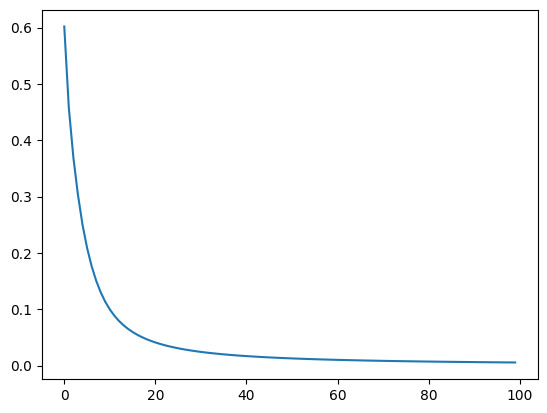

In [43]:
plt.plot(losses)
plt.show()

In [44]:
y_pred = y_pred.detach().cpu().numpy()
y_pred

array([0.00577788, 0.9919939 , 0.99282044, ..., 0.9875645 , 0.00408416,
       0.00385904], shape=(10000,), dtype=float32)

In [45]:
def binary_classification(array):
    return np.where(array >= 0.5, 1, 0)

fin_y_pred = binary_classification(y_pred)
fin_y_pred

array([0, 1, 1, ..., 1, 0, 0], shape=(10000,))

In [30]:
accuracy_assessment(fin_y_pred, y)

accuracy - 1.0
f1_score - 1.0
MSE - 0.0
MAE - 0.0


# :D